<a href="https://colab.research.google.com/github/016HaiderAli/Python/blob/main/FacialEmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Facial_Emotion_Recognition/Dataset.zip' -d '/content/drive/MyDrive/Facial_Emotion_Recognition' 

Archive:  /content/drive/MyDrive/Facial_Emotion_Recognition/Dataset.zip
replace /content/drive/MyDrive/Facial_Emotion_Recognition/Dataset/test/Angry/A5.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!nvidia-smi

Fri Nov 18 02:30:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator #To load images, do some preprocessing and augmentation
from keras.models import Sequential #Because we are going to pass data from one layer to another
from keras.layers import Dense,Dropout,Flatten #Dense for density of image, Dropout for overfitting and flatten because we need back chart to classify
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization #Conv2D For convolution fn
import os #To load images from directory
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [ ]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size =32

Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
					rescale=1./255, #Image ranges from .5 to 255
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True, #inverting image
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

Flow data from our directory

In [ ]:
train_generator = train_datagen.flow_from_directory(
					'/content/drive/MyDrive/Facial_Emotion_Recognition/Dataset/train',
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size=32, 
					class_mode='categorical', #since we have seven classes so not going to use binary
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							'/content/drive/MyDrive/Facial_Emotion_Recognition/Dataset/test',
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)

Found 55 images belonging to 7 classes.
Found 48 images belonging to 7 classes.


Creating list of labels

In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__() #next gives us the two values i.e img and label

Making the Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
#Relu prevent Vanishing of gradient problem

#Adding layers and Removing overfit (Hidden Layer)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

#need to make these layers flatten i.e make them linear when doing CNN Model 
model.add(Flatten())
#Since Flatten contain single vector we used dense to tell how many feature i.e the matrix.
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

#Output Layer - softmax because we have 7 classes. and not sigmoid that is used for binary
model.add(Dense(7, activation='softmax'))

#Compilation of our model
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
        train_generator,
        epochs=75,
        validation_data=validation_generator)

Epoch 1/75
2/2 [==============================] - 4s 3s/step - loss: 0.4323 - accuracy: 0.8182 - val_loss: 2.3497 - val_accuracy: 0.6458
Epoch 2/75
2/2 [==============================] - 3s 2s/step - loss: 0.3923 - accuracy: 0.8364 - val_loss: 2.2102 - val_accuracy: 0.6667
Epoch 3/75
2/2 [==============================] - 3s 2s/step - loss: 0.3871 - accuracy: 0.8545 - val_loss: 1.7704 - val_accuracy: 0.6875
Epoch 4/75
2/2 [==============================] - 3s 2s/step - loss: 0.2787 - accuracy: 0.9455 - val_loss: 1.8587 - val_accuracy: 0.7083
Epoch 5/75
2/2 [==============================] - 3s 2s/step - loss: 0.3235 - accuracy: 0.8545 - val_loss: 1.8901 - val_accuracy: 0.6875
Epoch 6/75
2/2 [==============================] - 3s 2s/step - loss: 0.4012 - accuracy: 0.8727 - val_loss: 1.9603 - val_accuracy: 0.6875
Epoch 7/75
2/2 [==============================] - 3s 2s/step - loss: 0.5054 - accuracy: 0.8545 - val_loss: 2.2944 - val_accuracy: 0.6667
Epoch 8/75
2/2 [=========================

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

Chart

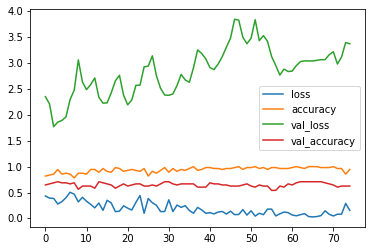

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Prediction

In [ ]:
predictions = model.predict(x = validation_generator)

2/2 [==============================] - 3s 478ms/step


In [ ]:
predictions = np.argmax(predictions, axis=-1)
for i in predictions:
    print(i)

0
0
0
4
1
4
3
2
1
6
1
1
1
2
5
6
1
3
0
3
2
2
5
0
0
5
0
1
3
0
6
2
4
6
5
0
1
5
5
1
0
1
1
6
3
6
5
1


In [ ]:
#training_set.class_indices

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

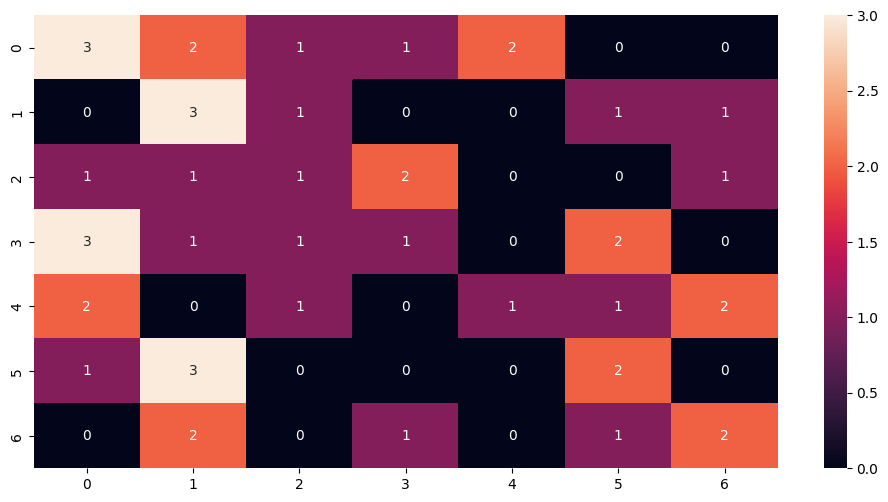

In [ ]:
plt.figure(figsize=(12,6), dpi = 100)
cm = confusion_matrix(validation_generator.labels, predictions)

sns.heatmap(cm, annot=True)

In [ ]:
train_path = "/content/drive/MyDrive/Facial_Emotion_Recognition/Dataset/train"
test_path = "/content/drive/MyDrive/Facial_Emotion_Recognition/Dataset/test"

#Take images and count them (because we are going to use it in epocx)
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)
    
print(num_train_imgs)
print(num_test_imgs)

55
48


Training the model

In [ ]:
epochs=30

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)

model.save('/content/drive/MyDrive/Facial_Emotion_Recognition/model_file_30epochs.h5')

Epoch 1/30
1/1 [==============================] - 20s 20s/step - loss: 1.9482 - accuracy: 0.0938 - val_loss: 1.9440 - val_accuracy: 0.1562
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 2.0348 - accuracy: 0.1250 - val_loss: 1.9401 - val_accuracy: 0.0938
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 1.9451 - accuracy: 0.1250 - val_loss: 1.9622 - val_accuracy: 0.0938
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 1.9736 - accuracy: 0.1250 - val_loss: 1.9575 - val_accuracy: 0.1250
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 1.9593 - accuracy: 0.1250 - val_loss: 1.9473 - val_accuracy: 0.1250
Epoch 6/30
1/1 [==============================] - 3s 3s/step - loss: 1.9161 - accuracy: 0.2188 - val_loss: 1.9470 - val_accuracy: 0.2188
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 1.9697 - accuracy: 0.0435 - val_loss: 1.9515 - val_accuracy: 0.1250
Epoch 8/30
1/1 [=======================

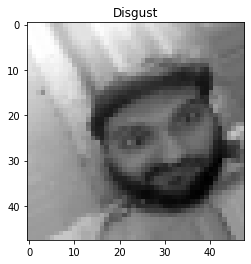

In [ ]:
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()